In [2]:
import pandas as pd 
import numpy as np 

from pyhhmm.gaussian import GaussianHMM 
from pandas_datareader.data import DataReader

import matplotlib.pyplot as plt

### Data

In [3]:
# data extraction 
start_date = '2017-01-1'
end_date = '2022-06-01'
symbol = "SPY"
data = DataReader(name=symbol, data_source="yahoo", start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Adj Close", "Volume"]]

In [4]:
# add return and range 
df = data.copy()
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1 # because latter - previous value in row level 
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2017-01-04,225.619995,226.750000,225.610001,205.000458,78744400.0,0.005949,0.005053
2017-01-05,226.270004,226.580002,225.479996,204.837601,78379000.0,-0.000794,0.004879
2017-01-06,226.529999,227.750000,225.899994,205.570450,71559900.0,0.003578,0.008189
2017-01-09,226.910004,227.070007,226.419998,204.891846,46939700.0,-0.003301,0.002871
2017-01-10,226.479996,227.449997,226.009995,204.891846,63771900.0,0.000000,0.006371


In [6]:
# structure data 
X_train = df[["Returns", "Range"]]
X_train.head()

,Returns,Range
Date,,
2017-01-04,0.005949,0.005053
2017-01-05,-0.000794,0.004879
2017-01-06,0.003578,0.008189
2017-01-09,-0.003301,0.002871
2017-01-10,0.000000,0.006371


### HMM Learning

In [7]:
# Train Model 
model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])

(<pyhhmm.gaussian.GaussianHMM at 0x16a00e4c0>, 9721.827148273293)

In [21]:
# check results 
hidden_states = model.predict([X_train.values])[0]
hidden_states[:40]
len(hidden_states)

1362

In [15]:
# regime state means for each feature 
model.means

array([[ 0.00232059,  0.00688868],
       [-0.0095674 ,  0.02709668],
       [-0.00086838,  0.01433298],
       [ 0.02901741,  0.03656455]])

In [18]:
# 
model.covars

array([[[ 3.65350187e-05,  1.60219655e-05],
        [ 1.60219655e-05,  2.07608097e-05]],

       [[ 5.05031382e-04, -8.85746023e-05],
        [-8.85746023e-05,  2.27021200e-04]],

       [[ 1.58071830e-04,  4.43304508e-05],
        [ 4.43304508e-05,  6.68149007e-05]],

       [[ 1.12963506e-03,  8.60929073e-04],
        [ 8.60929073e-04,  8.71306578e-04]]])

In [17]:
# helper function
# dir(model)

### Data Visualization

In [25]:
# structure the prices for plotting 
i = 0
labels_0 = []
labels_1 = [] 
labels_2 = [] 
labels_3 = []
prices = df["Adj Close"].values.astype(float)
print("Correct number of rows:", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1

Correct number of rows: True


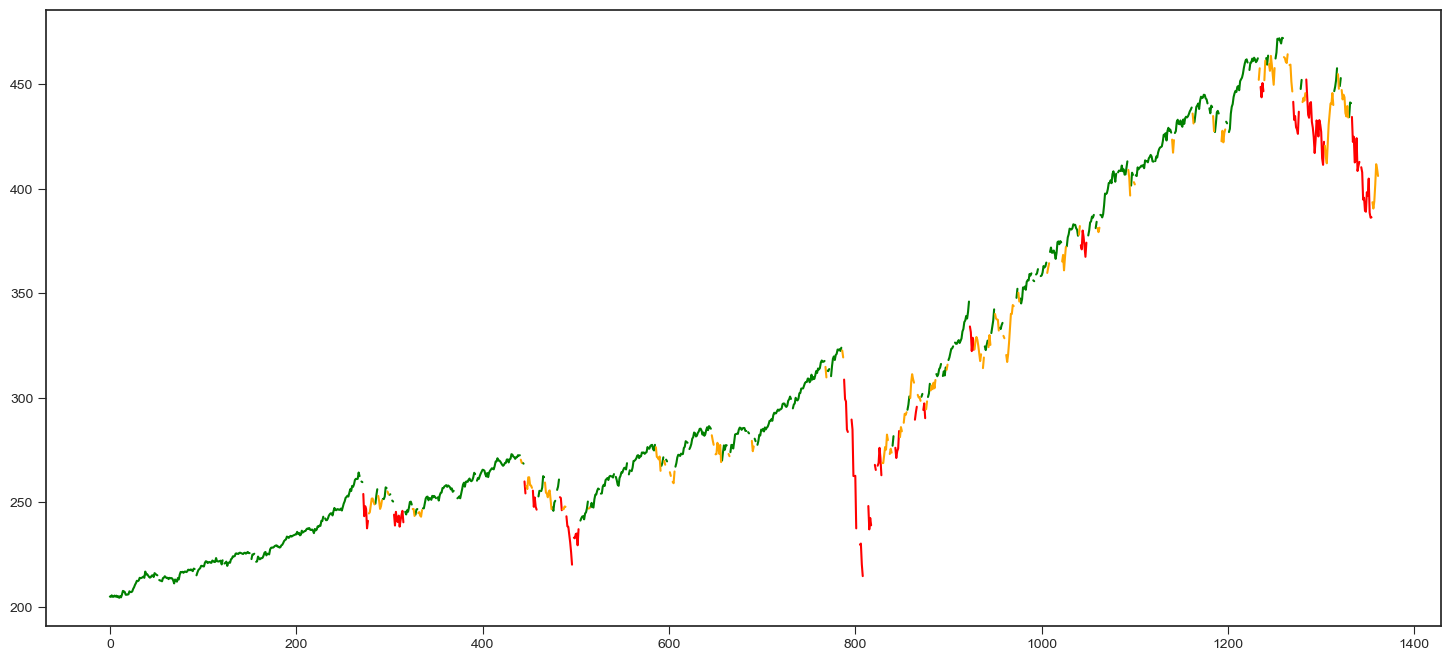

In [34]:
# plot chart 
fig = plt.figure(figsize=(18, 8))
plt.plot(labels_0, color="green")
plt.plot(labels_1, color="red")
plt.plot(labels_2, color="orange")
plt.plot(labels_3, color="black")
plt.show()

In [32]:
# moving average 
# https://www.youtube.com/watch?v=r3Ulu0jZCJI
# define a period as a day, for example a 20 days moving average, take value of 20 days and adding together / count
# this result is used as a value for the first day of that 20 days 
# when moving forward a day, drop the current first day and include a new day followed the current last day
# and do the calculation for that

In [33]:
# interesting way of using markov chain
# https://www.youtube.com/watch?v=sdp49vTanSk

In [ ]:
# first order matrix 


In [ ]:
# binning data: make continuous data into categorical data
# https://www.youtube.com/watch?v=iv_ec0EfXcE

# equal frequency binding in python

In [ ]:
# https://setosa.io/blog/2014/07/26/markov-chains/

In [ ]:
# https://www.youtube.com/watch?v=WT6jI8UgROI